## Part 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
path = r'C:\Users\aaron\Downloads\archive'

In [6]:
df = pd.read_csv(os.path.join(path, 'A6_Data.csv'), index_col = False)

## Part 2

This is the question that I'll be exploring in this notebook.

What criteria is most common in the top universities?

In [11]:
df = df.drop(columns = ['Unnamed: 0'])

In [13]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'rank_for_education', 'rank_for_alumni_employment', 'rank_for_faculty',
       'rank_for_publications', 'rank_for_influence',
       'rank_for_number_of_students', 'rank_for_patents', 'average_rank',
       'score', 'year'],
      dtype='object')

I will be using every variable for this task except for institution, country, and year.

## Part 3

In [18]:
# Making a subset for the heatmap
df_hm = df[['world_rank', 'national_rank', 'rank_for_education', 'rank_for_alumni_employment', 'rank_for_faculty', 'rank_for_publications', 'rank_for_influence', 'rank_for_number_of_students', 'rank_for_patents', 'score']]

In [20]:
df_hm.shape

(2200, 10)

In [22]:
# normal correlation matrix
df_hm.corr()

,world_rank,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,score
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.698214,-0.549098
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.159440,-0.199756
rank_for_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.528120,-0.600541
rank_for_alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.528219,-0.510374
rank_for_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.555107,-0.693540
rank_for_publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.671558,-0.522111
rank_for_influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.611811,-0.522837
rank_for_number_of_students,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.598728,-0.522438
rank_for_patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,1.000000,-0.474810
score,-0.549098,-0.199756,-0.600541,-0.510374,-0.693540,-0.522111,-0.522837,-0.522438,-0.474810,1.000000


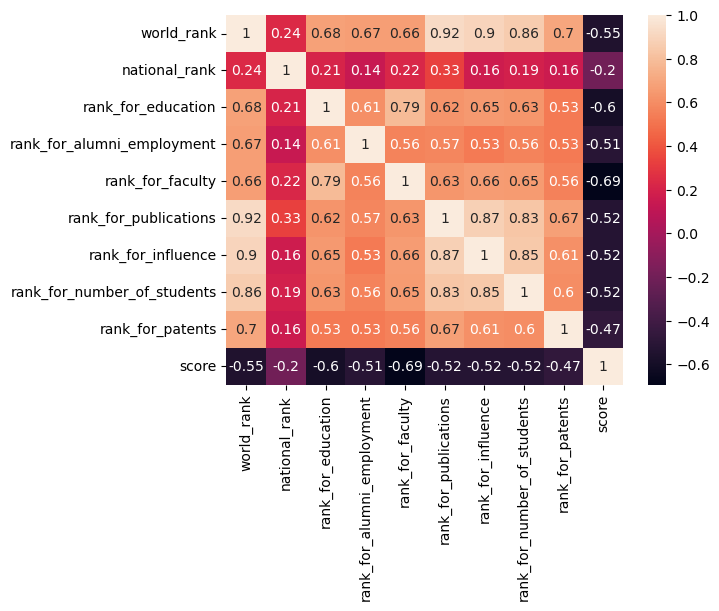

In [24]:
# colored heatmap
corr = sns.heatmap(df_hm.corr(), annot = True)

The first thing that I want to point out is the negative relation the score has to everything else. The score is measured so that the higher number is more valuable, while all of the ranks have it so the lower number is more valuable.

From these coefficients the three most prominent criteria impacting the world rankings are publications, influence, and number of students. Also these same criteria have strong relationships with each other.

## Part 4

Text(0.5, 1.0, 'Publications impact on world rankings')

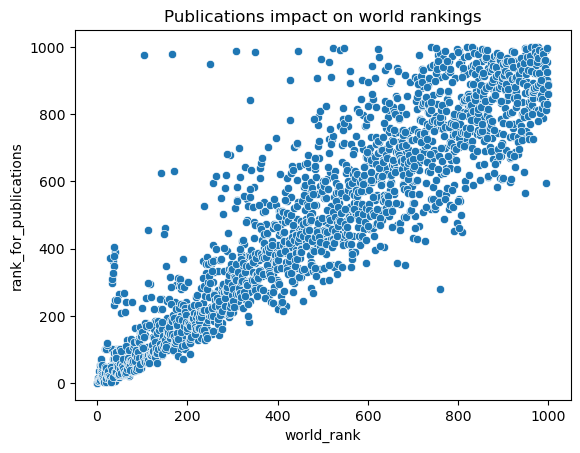

In [29]:
# world rank and publications rank scatterplot
scatter1 = sns.scatterplot(x = 'world_rank', y = 'rank_for_publications', data = df)
plt.title('Publications impact on world rankings')

Text(0.5, 1.0, 'Influences impact on world rankings')

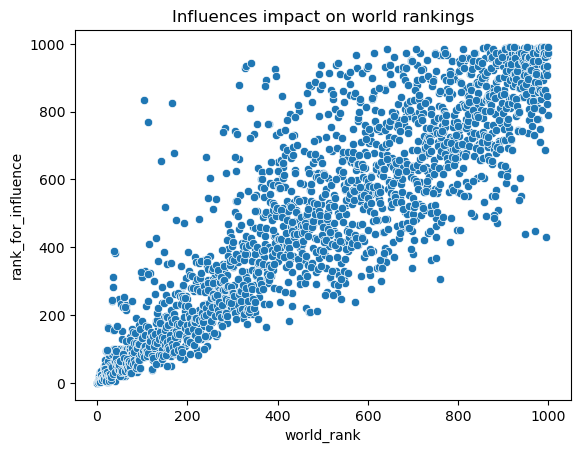

In [31]:
# world rank and influence rank scatterplot
scatter2 = sns.scatterplot(x = 'world_rank', y = 'rank_for_influence', data = df)
plt.title('Influences impact on world rankings')

Text(0.5, 1.0, 'Number of students impact on world rankings')

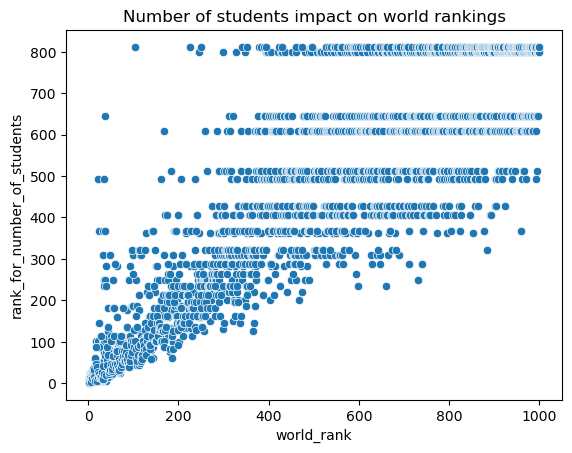

In [33]:
# world rank and number of students rank scatterplot
scatter3 = sns.scatterplot(x = 'world_rank', y = 'rank_for_number_of_students', data = df)
plt.title('Number of students impact on world rankings')

Remember that the lower numbers are more valuable in these graphs.

All of these graphs follow a strong positive correlation with each other. Though there are a lot of outliers. In the first two graphs these outliers are primarily universities with a high or average world rank, but much lower ranks in publications and influence. The third graph is a lot more spread apart in it;s data points, but follow a similar pattern of high world ranks with low number of students ranks.

## Part 5

In [38]:
# making a new subset without the national rank
df_pair = df[['world_rank', 'rank_for_education', 'rank_for_alumni_employment', 'rank_for_faculty', 'rank_for_publications', 'rank_for_influence', 'rank_for_number_of_students', 'rank_for_patents', 'score']]

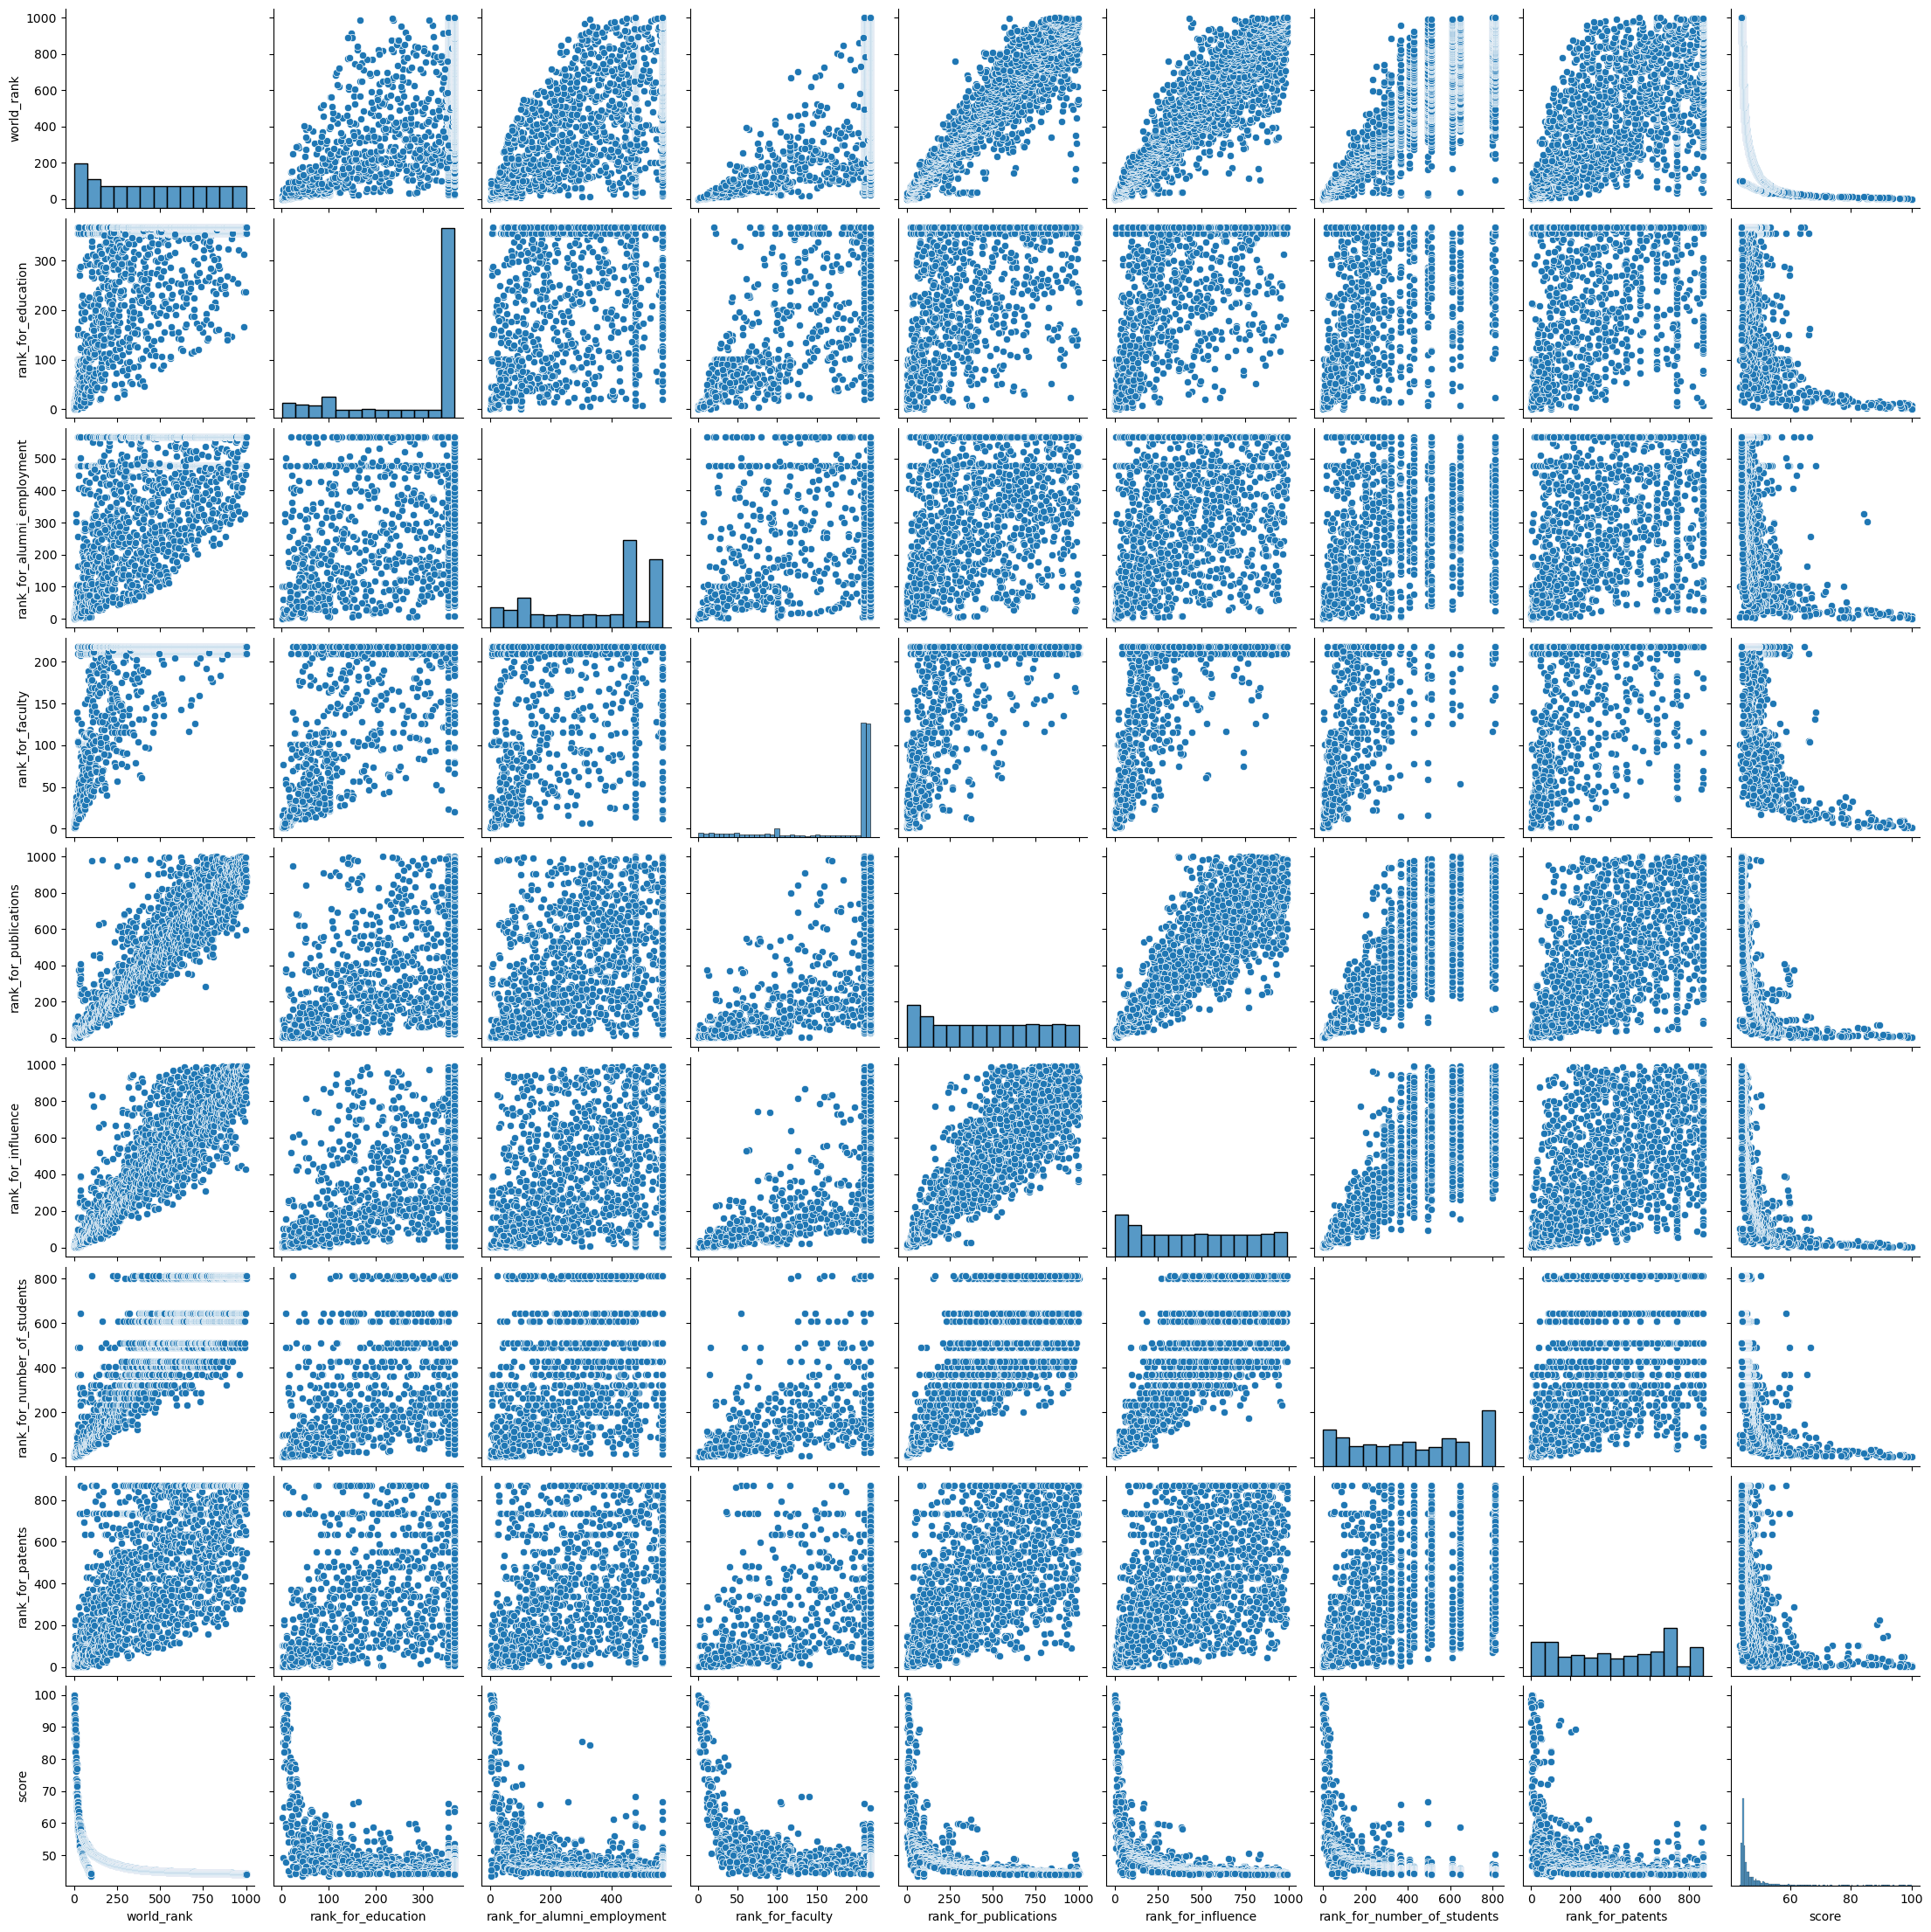

In [40]:
# pair plot
pair = sns.pairplot(df_pair)

In [ ]:
pair.figure.savefig(os.path.join(path, 'Pair Plot.png'))

The first thing I noticed is that in the bottom right corner of each world ranking graph is completely vacant. This showing that while universities with a high world rank can have a very low rank in one of the seven criterias, universities with a low world rank never rank high in any of the criterias.

Also the scores that a university can get drops dramatically compared to any of the rankings. And the weird tail the score world rank graph has is extreamly out of place. Why do some universities with a very high rank have significantly lower scores than everyone else?

## Part 6

<Axes: xlabel='rank_for_number_of_students', ylabel='Count'>

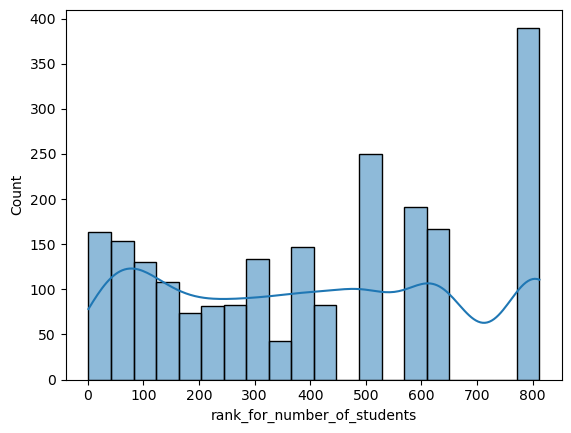

In [45]:
#Making a histogram of the number of students to segment it for the categorical plot
sns.histplot(df['rank_for_number_of_students'], bins = 20, kde = True)

In [47]:
df.loc[df['rank_for_number_of_students'] < 200, 'Rank category'] = 'High Rank'

In [49]:
df.loc[(df['rank_for_number_of_students'] >= 200) & (df['rank_for_number_of_students'] < 600), 'Rank category'] = 'Middle Rank'

In [51]:
df.loc[df['rank_for_number_of_students'] >= 600, 'Rank category'] = 'Low Rank'

In [53]:
df['Rank category'].value_counts(dropna = False)

Rank category
Middle Rank    842
Low Rank       748
High Rank      610
Name: count, dtype: int64

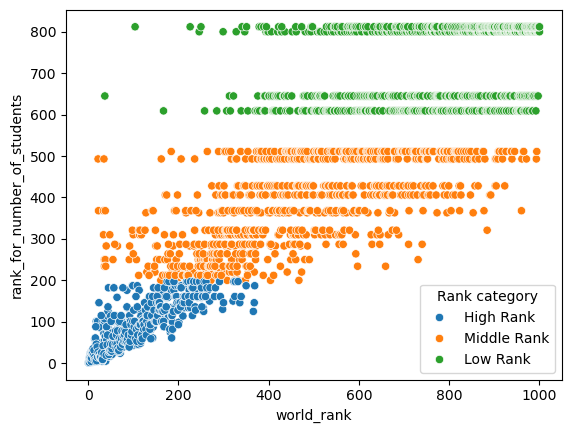

In [55]:
# Making the categorical plot
cat = sns.scatterplot(x = 'world_rank', y = 'rank_for_number_of_students', hue = 'Rank category', data = df)

Following a positive correlation, the universities that have a high rank for their number of enrolled students maintain a high world rank. Those with a middle rank in this criteria are more spread out in there world ranks, and those with a low rank are far more likely to have lower world ranks.

## Part 7

Going back to the question that started this notebook, from this analysis I can say that the impact of a single criteria isn't that much. Though the rankings for publication and influence are by far the most consistant, there still are lots of universities that rank low in one or two criteria while still being near the top of the world ranks.

I think a good way to expand on this analysis is to get a universities average rank from all seven criteria and compare those to the world ranks.

## Part 8

My hypotheses is that the average rank from all criteries is what impacts the a universities world rank